In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

In [28]:
def get_stock_data(ticker, interval='1d', period='1mo'):
    """
    used for fetching historical stock data.
        ticker: name of the fund
        interval: time interval for fetching data ('1d', '1h', '1m', etc.)
        period: period to fetch data for ('1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max')
    """
    stock = yf.Ticker(ticker)
    data = stock.history(interval=interval, period=period)
    return data

In [29]:
data = get_stock_data('AAPL', interval='1h', period='1mo')

In [30]:
print(data.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-28 09:30:00-04:00  233.315002  234.550003  232.550003  233.634598   
2024-10-28 10:30:00-04:00  233.619995  234.330002  233.220001  233.550003   
2024-10-28 11:30:00-04:00  233.550003  234.315002  233.149994  234.310104   
2024-10-28 12:30:00-04:00  234.309998  234.729996  233.932602  234.429993   
2024-10-28 13:30:00-04:00  234.425003  234.645004  233.910004  233.914993   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-10-28 09:30:00-04:00  7460256        0.0           0.0  
2024-10-28 10:30:00-04:00  3740019        0.0           0.0  
2024-10-28 11:30:00-04:00  2911796        0.0           0.0  
2024-10-28 12:30:00-04:00  2874054        0.0           0.0  
2024-10-28 13:30:00-04:00  1760124        0.0           0.0  


In [32]:
print(data.tail())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-25 11:30:00-05:00  231.705002  231.850006  229.960007  230.206802   
2024-11-25 12:30:00-05:00  230.199997  230.580002  229.740005  230.414993   
2024-11-25 13:30:00-05:00  230.425003  230.740005  230.199997  230.684998   
2024-11-25 14:30:00-05:00  230.664993  230.850006  230.095001  230.520004   
2024-11-25 15:30:00-05:00  230.501297  233.169998  229.845001  232.880005   

                             Volume  Dividends  Stock Splits  
Datetime                                                      
2024-11-25 11:30:00-05:00   3682262        0.0           0.0  
2024-11-25 12:30:00-05:00   2947971        0.0           0.0  
2024-11-25 13:30:00-05:00   2057791        0.0           0.0  
2024-11-25 14:30:00-05:00   2752031        0.0           0.0  
2024-11-25 15:30:00-05:00  11344808        0.0           0.0  


In [33]:
print(data.shape)

(147, 7)


In [79]:
def plot_stock_data(data, title='Stock Price'):
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='xkcd:lavender')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

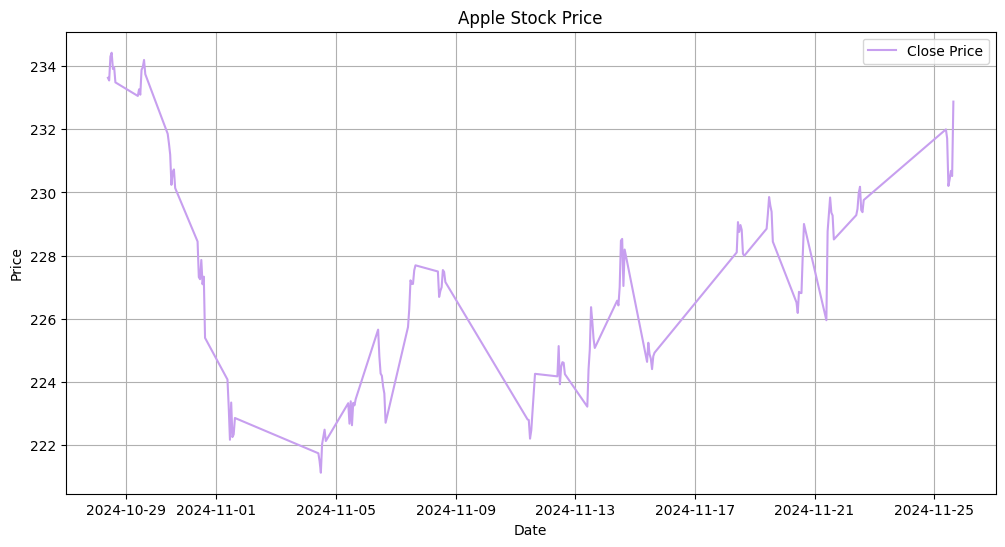

In [80]:
plot_stock_data(data, title='Apple Stock Price')

In [ ]:
## AI GENERATED CODE, REVIEW BEFORE USE

def find_extrema(data, column='Close', order=5):
    """
    Find local and global extrema of stock prices.
    Args:
        data (pandas.DataFrame): Stock data with a column to analyze.
        column (str): Column name to find extrema (default is 'Close').
        order (int): Minimum distance between extrema.
    Returns:
        dict: Dictionary with local and global extrema indices and values.
    """
    prices = data[column]
    local_maxima = argrelextrema(prices.values, np.greater, order=order)[0]
    local_minima = argrelextrema(prices.values, np.less, order=order)[0]

    global_max = prices.idxmax()
    global_min = prices.idxmin()

    return {
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'global_max': (global_max, prices[global_max]),
        'global_min': (global_min, prices[global_min]),
    }

In [37]:
extrema = find_extrema(data, column='Close', order=5)
print(extrema)

{'local_maxima': array([  3,  12,  49,  62,  78,  95, 106, 114, 129, 140]), 'local_minima': array([  7,  37,  55,  64,  72,  84, 102, 111, 120, 126, 132]), 'global_max': (Timestamp('2024-10-28 12:30:00-0400', tz='America/New_York'), np.float64(234.42999267578125)), 'global_min': (Timestamp('2024-11-04 11:30:00-0500', tz='America/New_York'), np.float64(221.11509704589844))}


In [ ]:
def plot_extrema(data, extrema, column='Close'):
    # Plot stock prices with extrema considering the column named "Close"

    plt.figure(figsize=(12, 6))
    plt.plot(data[column], label='Close Price', color='xkcd:lavender')

    # to show the dates of the extremas
    dates = data.index
    local_max_dates = dates[extrema['local_maxima']]
    local_min_dates = dates[extrema['local_minima']]
    
    plt.scatter(
        local_max_dates,
        data[column].iloc[extrema['local_maxima']],
        color='xkcd:magenta', label='Local Maxima', marker='^', s=100
    )
    plt.scatter(
        local_min_dates,
        data[column].iloc[extrema['local_minima']],
        color='purple', label='Local Minima', marker='v', s=100
    )

    global_max, max_value = extrema['global_max']
    global_min, min_value = extrema['global_min']

    plt.scatter(global_max, max_value, color='orchid', label='Global Max', s=200)
    plt.scatter(global_min, min_value, color='indigo', label='Global Min', s=200)
    plt.text(global_max, max_value, f'  {max_value:.2f}', color='orchid')
    plt.text(global_min, min_value, f'  {min_value:.2f}', color='indigo', fontsize=10)

    plt.title('Stock Price with Extrema')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

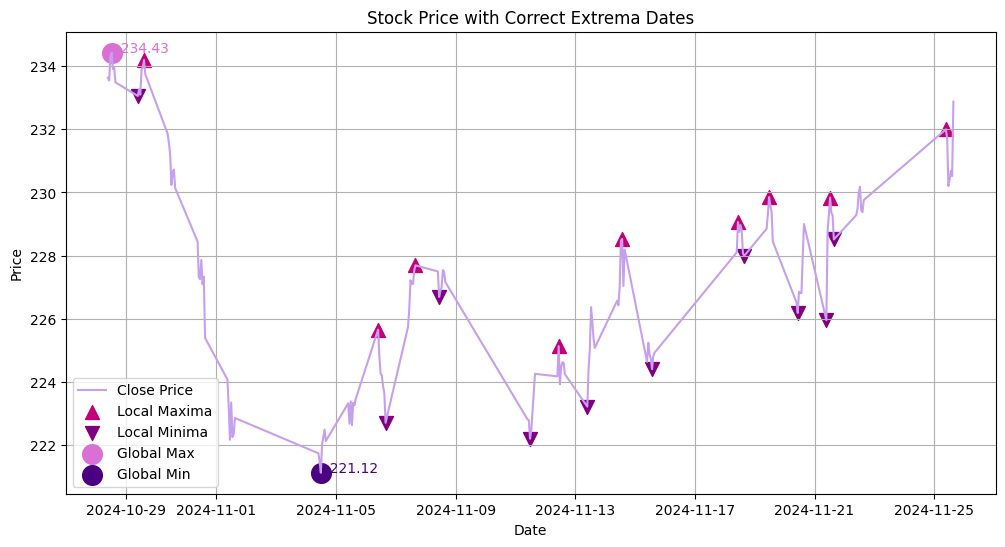

In [82]:
plot_extrema(data, extrema, column='Close')